# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

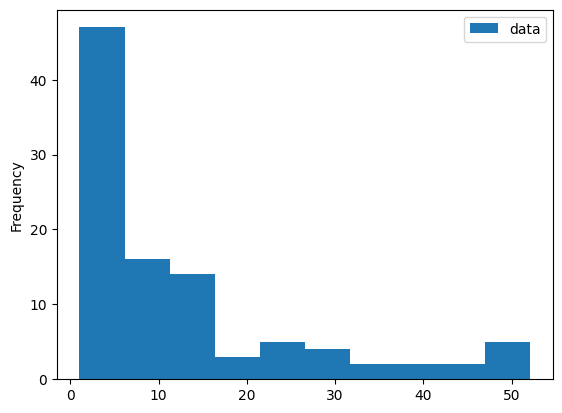

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

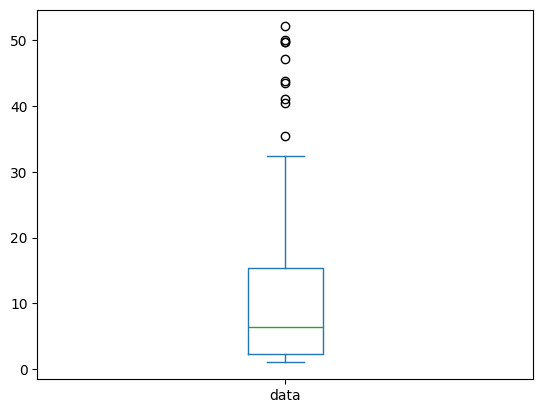

In [3]:
df.plot.box()

## Analysis of Histogram vs. Boxplot for Drug Price Data
### The Scenario
A pharmacy administrator wants to understand the cost of the more expensive drugs in the context of the overall price distribution.

### Histogram: Pros & Cons
Pros:

**Shows Overall Distribution:** It clearly visualizes the shape of the data, revealing that it is strongly right-skewed. This tells us that most drugs are inexpensive, with a long tail of higher-priced items.
Identifies Frequency: It shows how many drugs fall into specific price ranges (bins), making it easy to see the most common price bracket.
Cons:

**Hides Outliers:** It's difficult to identify the exact prices or number of expensive drugs, as they are often grouped into the last few bins.
Lacks Statistical Detail: It does not explicitly show key statistical measures like the median or quartiles (75th percentile, etc.).
Bin-dependent: The chart's appearance can change significantly depending on the chosen bin width, potentially obscuring features of the data.

### Boxplot: Pros & Cons
Pros:

**Highlights Key Statistics:** It provides a clear summary of the data, showing the median, interquartile range (IQR), and full range at a glance.
Excellent for Outlier Detection: The plot explicitly marks outliers as individual points. This directly answers the administrator's question about the prices of "more expensive drugs."
Cons:

**Obscures Distribution Shape:** It doesn't show the frequency of data points. You can't tell if the distribution is bimodal or see the specifics of its skewness as you can with a histogram.
Which to Choose & Why?
For this specific scenario, the Boxplot is the superior choice.

The administrator's primary goal is to identify and understand **the prices of expensive drugs (the outliers)**. The boxplot is designed to do exactly that, clearly separating the main body of data from the extreme values and showing their specific price points.

### How to Improve the Charts
To make the charts more informative and visually appealing, we can:

Add a clear title and axis labels with units (e.g., "Price in $").
For the Histogram: Overlay a Kernel Density Estimate (KDE) plot to better visualize the distribution's shape.
For the Boxplot: Make it horizontal for easier reading of the price axis and annotate key statistics like the median and 75th percentile.
Alternative: Use a Violin Plot, which combines the statistical summary of a boxplot with the distribution shape of a KDE plot.

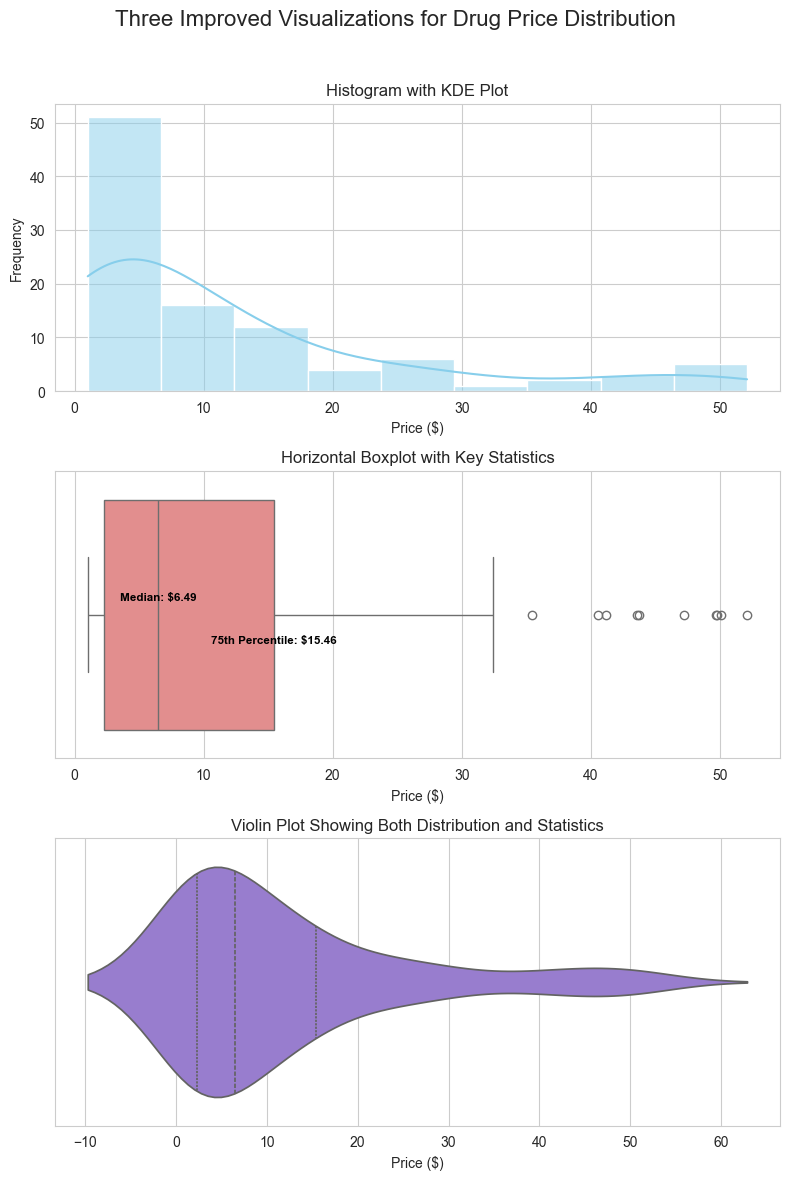

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate the same sample data from the notebook ---
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["price"]) # Changed column name for clarity

# --- 2. Create a figure with three subplots for comparison ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Three Improved Visualizations for Drug Price Distribution', fontsize=16)
sns.set_style("whitegrid") # Apply a clean grid style

# --- Chart 1: Improved Histogram with KDE ---
ax1 = axes[0]
sns.histplot(df, x="price", kde=True, ax=ax1, color='skyblue')
ax1.set_title("Histogram with KDE Plot")
ax1.set_xlabel("Price ($)")
ax1.set_ylabel("Frequency")

# --- Chart 2: Improved Horizontal Boxplot with Annotations ---
ax2 = axes[1]
sns.boxplot(df, x="price", ax=ax2, color='lightcoral', orient='h')
ax2.set_title("Horizontal Boxplot with Key Statistics")
ax2.set_xlabel("Price ($)")

# Calculate statistics for annotation
median_val = df['price'].median()
q3_val = df['price'].quantile(0.75)

# Add annotations to the boxplot
ax2.text(median_val, -0.05, f'Median: ${median_val:.2f}',
         horizontalalignment='center', size='small', color='black', weight='semibold')
ax2.text(q3_val, 0.1, f'75th Percentile: ${q3_val:.2f}',
         horizontalalignment='center', size='small', color='black', weight='semibold')

# --- Chart 3: Violin Plot (The "Best of Both Worlds" Alternative) ---
ax3 = axes[2]
sns.violinplot(df, x="price", ax=ax3, color='mediumpurple', inner='quartile')
ax3.set_title("Violin Plot Showing Both Distribution and Statistics")
ax3.set_xlabel("Price ($)")


# --- Display the final plots ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [18]:
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter

print(os.listdir())
print(os.getcwd()) 

path = kagglehub.dataset_download("abcbbong/bu-699-o2")

print("Path to dataset files:", path)



df_fraud_train = pd.read_csv(os.path.join(path, 'fraud_train_processed.csv'))
df_fraud_test = pd.read_csv(os.path.join(path, 'fraud_test_processed.csv'))          
df_credit_approval = pd.read_csv(os.path.join(path, 'credit_approval_processed.csv'))
df_loan_default = pd.read_csv(os.path.join(path, 'loan_default_processed.csv'))


['OMDS-MODB2-Week1-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week2-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week3-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week4-Lee-JaeHoon.ipynb', 'data']
f:\BU\CDSDX 699 O2\Homework


100%|██████████| 214M/214M [00:12<00:00, 18.4MB/s] 

Extracting files...


Path to dataset files: C:\Users\abcbb\.cache\kagglehub\datasets\abcbbong\bu-699-o2\versions\1


In [19]:
df_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1296675 non-null  int64  
 1   trans_date_trans_time    1296675 non-null  object 
 2   cc_num                   1296675 non-null  int64  
 3   merchant                 1296675 non-null  object 
 4   category                 1296675 non-null  object 
 5   amt                      1296675 non-null  float64
 6   first                    1296675 non-null  object 
 7   last                     1296675 non-null  object 
 8   gender                   1296675 non-null  object 
 9   street                   1296675 non-null  object 
 10  city                     1296675 non-null  object 
 11  state                    1296675 non-null  object 
 12  zip                      1296675 non-null  int64  
 13  lat                      1296675 non-null 

In [13]:
df_fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               555719 non-null  int64  
 1   trans_date_trans_time    555719 non-null  object 
 2   cc_num                   555719 non-null  int64  
 3   merchant                 555719 non-null  object 
 4   category                 555719 non-null  object 
 5   amt                      555719 non-null  float64
 6   first                    555719 non-null  object 
 7   last                     555719 non-null  object 
 8   gender                   555719 non-null  object 
 9   street                   555719 non-null  object 
 10  city                     555719 non-null  object 
 11  state                    555719 non-null  object 
 12  zip                      555719 non-null  int64  
 13  lat                      555719 non-null  float64
 14  long

In [14]:
df_credit_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 46 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Applicant_ID                                                    25128 non-null  int64 
 1   Applicant_Gender                                                25128 non-null  object
 2   Owned_Car                                                       25128 non-null  int64 
 3   Owned_Realty                                                    25128 non-null  int64 
 4   Total_Children                                                  25128 non-null  int64 
 5   Total_Income                                                    25128 non-null  int64 
 6   Income_Type                                                     25128 non-null  object
 7   Education_Type                                            

In [15]:
df_loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87500 non-null  int64  
 1   Asst_Reg               87500 non-null  int64  
 2   GGGrade                87500 non-null  object 
 3   Experience             87500 non-null  object 
 4   Validation             87500 non-null  object 
 5   Yearly_Income          87500 non-null  float64
 6   Home_Status            87500 non-null  object 
 7   Unpaid_2_years         87500 non-null  int64  
 8   Already_Defaulted      87500 non-null  int64  
 9   Designation            86086 non-null  object 
 10  Debt_to_Income         87500 non-null  float64
 11  Postal_Code            86111 non-null  float64
 12  Lend_Amount            87500 non-null  float64
 13  Deprecatory_Records    87500 non-null  int64  
 14  Interest_Charged       87500 non-null  float64
 15  Us

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.